Labourers from Malaga (Spain) and Tanger (Morocco) were asked to get a blood test in order to carry out a study. It was noted that the workers' energy consumption habits were notably different between both cities. Malaga's labourers presented a caloric intake that the researcher, a Mororccan doctor, considered excesive, especially when compering the meals proportions served at Malaga's restaurants to the family meals frequently shared in Morocco. The researcher's hypothese suggests that these food differences could be reflected in the blood test results and the BMI.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
# Reading CSV
df = pd.read_csv('comparingDietBlood.csv', sep = ';')
# Convert 'Talla' from object to float, replacing ',' with '.'
df['Height'] = df['Height'].str.replace(',', '.').astype(float)
df.head()

,Group,Cholesterol,Triglycerides,Glucose,Systolic BP,Diastolic BP,Weight,Height,Consumption,Exercise
0,Malaga,238,107,89,130,70,81,1.67,3521,1400
1,Tanger,251,163,90,130,90,85,1.67,1490,1730
2,Malaga,194,73,89,120,60,79,1.70,3701,2180
3,Tanger,169,71,65,110,60,86,1.81,3200,2150
4,Malaga,227,114,121,130,90,91,1.73,4124,1700


We use descriptive statistics to observe the differences between Malaga and Tanger.

In [9]:
df_group = df.groupby('Group')
dg = df_group.describe().T # Transposed
dg

Group                   Malaga       Tanger
Cholesterol count    50.000000    30.000000
            mean    209.120000   162.666667
            std      42.418055    44.806352
            min     102.000000    82.000000
            25%     184.250000   136.250000
...                        ...          ...
Exercise    min    1090.000000  1430.000000
            25%    1553.500000  1782.500000
            50%    1895.000000  1865.000000
            75%    2178.750000  2008.750000
            max    2910.000000  2258.000000

[72 rows x 2 columns]

Next, we will explore the distribution of energy consumption in both groups using histograms.

In [13]:
def plot_histogram(df, groups):
    # Creates two plots, next to each other, that share both axes
    fig, axes = plt.subplots(nrows = 1, ncols = len(groups), figsize = (10, 4), sharex = True, sharey = True, layout = 'constrained')

    i = 0
    for group in groups:
        # Gets a dataframe with the rows of the group being studied
        dg = df[df['Group'] == group]
        # For the rows obtained previously, select the 'Consumption' column and divide the data in 20 bins
        axes[i].hist(dg.loc[:, 'Consumption'], bins = 20, color = '#FFB347', edgecolor = 'black', alpha = 1)
        axes[i].set_title(group)
        axes[i].grid(True)
        i += 1

    fig.supxlabel('Consumption (kWh)')
    fig.supylabel('Count')
    plt.show()
    return

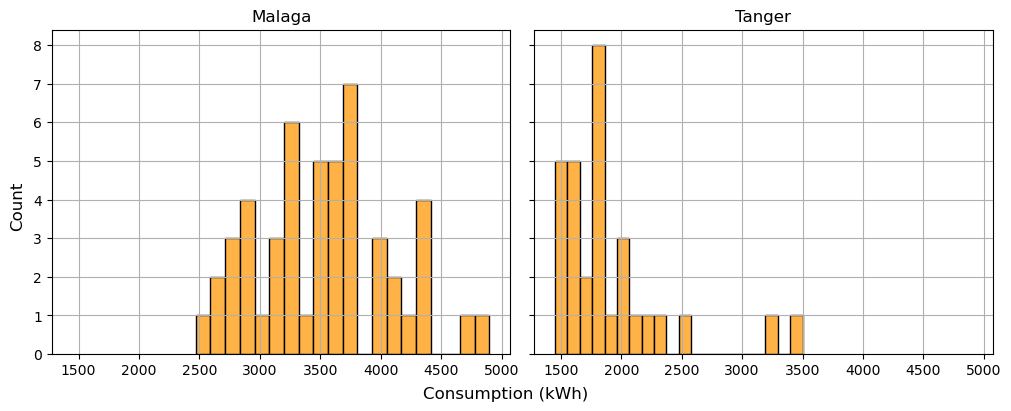

In [15]:
groups = df['Group'].unique() # Gets all the groups
plot_histogram(df, groups)

Using boxplot, we will compare the energy consumption between the two groups.

In [17]:
def plot_consumo_box(df, groups):
    plt.figure(dpi = 144)

    # Gets the data in the 'Consumption' column divided by groups
    dg = [df[df['Group'] == group]['Consumption'] for group in groups]
    plt.boxplot(dg, labels = groups) # Creates the boxplot
    
    plt.ylabel('Consumption (kWh)')
    plt.show()
    return

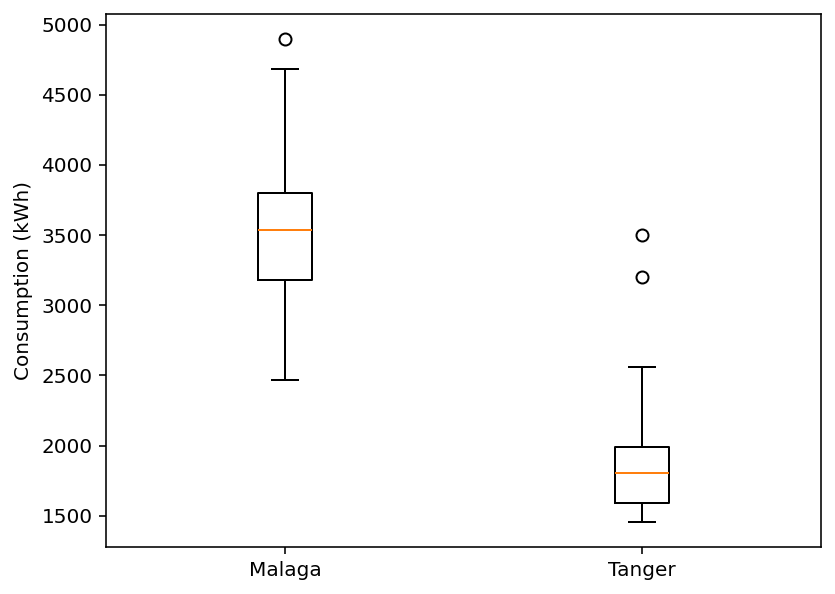

In [19]:
plot_consumo_box(df, groups)

Seeing that the differences between the two groups is big, we are now going to study the colesterol alongside other blood variables.

In [21]:
def plot_consumo_box(df, groups):
    plt.figure(dpi = 144)

    # Gets the data in the 'Cholesterol' column divided by groups
    dg = [df[df['Group'] == group]['Cholesterol'] for group in groups]
    plt.boxplot(dg, labels = groups) # Creates the boxplot
    
    plt.ylabel('Cholesterol (mg/dL)')
    plt.show()
    return

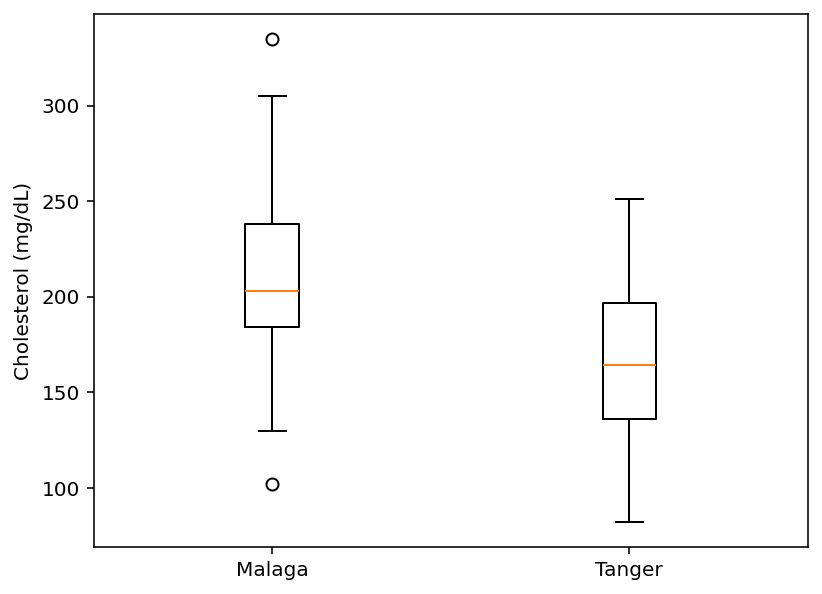

In [89]:
plot_consumo_box(df, groups)

In [91]:
def plot_regresion(df, groups):
    # Creates the figure and the axes
    fig, ax = plt.subplots(dpi=144, figsize=(8, 6))

    for group in groups:
        # Gets a dataframe with the rows of the group being studied
        dg = df[df['Group'] == group]
        # Generates a scatter plot comparing the cholesterol against the consumption for the group being studied
        ax.scatter(dg['Consumption'], dg['Cholesterol'], marker = 'o', s = 10, label = group)

        # Sets a linear regression line (1) to the data
        # Saves the results in the coefficients of the equation of the line
        m, b = np.polyfit(dg['Consumption'], dg['Cholesterol'], 1)
        # Draws a line in the graph given the axes X and the equation of the line
        ax.plot(dg['Consumption'], m * dg['Consumption'] + b, label = f'Regresion {group}')

    ax.grid(True)
    ax.set_xlabel('Consumption (kWh)')
    ax.set_ylabel('Cholesterol (mg/dL)')
    ax.legend()
    return

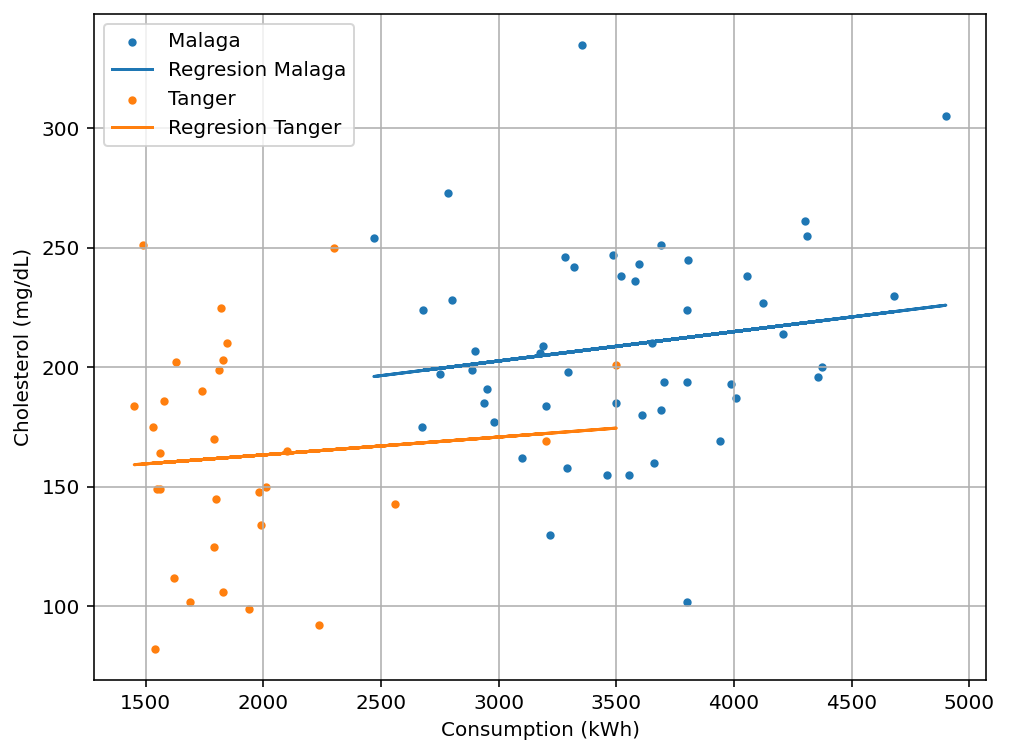

In [93]:
plot_regresion(df, groups)